In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')


In [78]:
df["question1"][5]

'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'

In [3]:
df.shape

(404290, 6)

In [76]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [4]:
new_df = df.sample(100000,random_state=2)

In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [7]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [8]:
new_df.duplicated().sum()

0

In [15]:
import string
def remove_punctuation(text):
    if isinstance(text, str):  
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    else:
        return text 

In [16]:
new_df["question1"]=new_df["question1"].apply(remove_punctuation)

In [17]:
new_df["question2"]=new_df["question2"].apply(remove_punctuation)

In [18]:
new_df["question1"]

398782    What is the best marketing automation tool for...
115086      I am poor but I want to invest What should I do
327711    I am from India and live abroad I met a guy fr...
367788    Why do so many people in the US hate the south...
151235                   Consequences of Bhopal gas tragedy
                                ...                        
147622                               Why do you live a life
353951    Why are Golden Retriever dogs with blue eyes s...
251765                  How do I learn computer practically
150383    I want to start a new business in India approx...
165218    How do I become successful in medical insuranc...
Name: question1, Length: 100000, dtype: object

In [19]:
for i in (new_df["question1"].str.split(' ')):
        print(i)
        break
    
    

['What', 'is', 'the', 'best', 'marketing', 'automation', 'tool', 'for', 'small', 'and', 'midsize', 'companies']


In [20]:
c=0
for i in (new_df["question1"].str.split(' ')):
        print(i)
        c+=1
        if(c==3):
            break
    
    

['What', 'is', 'the', 'best', 'marketing', 'automation', 'tool', 'for', 'small', 'and', 'midsize', 'companies']
['I', 'am', 'poor', 'but', 'I', 'want', 'to', 'invest', 'What', 'should', 'I', 'do']
['I', 'am', 'from', 'India', 'and', 'live', 'abroad', 'I', 'met', 'a', 'guy', 'from', 'France', 'in', 'a', 'partyI', 'want', 'to', 'date', 'him', 'How', 'do', 'I', 'do', 'that']


In [21]:
c=0
for i in (new_df["question1"].str.split(' ')):
        print(i[0])
        c+=1
        if(c==3):
            break
    
    

What
I
I


In [22]:
for i in (new_df["question1"].str.split(' ')):
        for j in i:
            if(j.lower()=="imo" or j.lower()=="aka" or j.lower()=="idk"):
                print(j)
                break
                #bhot shortforms used hui h unko samhalna h 
    
    

aka
IMO
aka
IMO
IMO
AKA
IMO
imo
IMO
aka
aka
imo
aka
Imo
IMO
imo
imo
imo
IMO
IMO


In [23]:
abbreviation_dict = {
    "ASAP": "As Soon As Possible",
    "FYI": "For Your Information",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "TBA": "To Be Announced",
    "TBC": "To Be Confirmed",
    "TBD": "To Be Decided/Determined",
    "ETA": "Estimated Time of Arrival",
    "FAQ": "Frequently Asked Questions",
    "ICYMI": "In Case You Missed It",
    "IDK": "I Don't Know",
    "IIRC": "If I Recall Correctly",
    "N/A": "Not Applicable",
    "BRB": "Be Right Back",
    "BTW": "By The Way",
    "AFAIK": "As Far As I Know",
    "AKA": "Also Known As",
    "NVM": "Never Mind",
    "NP": "No Problem",
    "TIA": "Thanks In Advance",
    "LOL": "Laugh Out Loud",
    "ROFL": "Rolling On the Floor Laughing",
    "LMK": "Let Me Know",
    "GG": "Good Game",
    "AFK": "Away From Keyboard",
    "TTYL": "Talk To You Later",
    "OMW": "On My Way",
    "TBH": "To Be Honest",
    "FTW": "For The Win",
    "DM": "Direct Message",
    "PM": "Private Message",
    "IRL": "In Real Life",
    "TL;DR": "Too Long; Didn't Read",
    "YOLO": "You Only Live Once",
    "SMH": "Shaking My Head",
    "ICYDK": "In Case You Didn't Know",
    "MIA": "Missing In Action",
    "BFF": "Best Friends Forever",
    "JK": "Just Kidding",
    "IDC": "I Don't Care",
    "SMH": "Shaking My Head",
    "BBS": "Be Back Soon",
    "GTG": "Got To Go",
    "OOTD": "Outfit Of The Day",
    "BF": "Boyfriend",
    "GF": "Girlfriend",
    "IDC": "I Don't Care",
    "PLZ": "Please",
    "PPL": "People",
    "RN": "Right Now",
    "SRS": "Serious",
    "SRSLY": "Seriously",
    "WB": "Welcome Back",
    "IDK": "I Don't Know",
    "IKR": "I Know, Right?",
    "WTF": "What The F***",
    "FOMO": "Fear Of Missing Out",
    "BRB": "Be Right Back",
    "TGIF": "Thank God It's Friday",
    "WTH": "What The Heck",
    "LMAO": "Laughing My Ass Off",
    "BFN": "Bye For Now",
    "OMG": "Oh My God",
    "XOXO": "Hugs and Kisses",
    "GR8": "Great",
    "CUL8R": "See You Later",
    "HAND": "Have A Nice Day",
    "POTD": "Picture Of The Day",
    "TMI": "Too Much Information",
    "ICYMI": "In Case You Missed It",
    "BAE": "Before Anyone Else",
    "HBD": "Happy Birthday",
    "IDTS": "I Don't Think So",
    "IYKYK": "If You Know, You Know",
    "YOLO": "You Only Live Once"
}


In [24]:
import string
def chat_conversion(text):
    if isinstance(text, str):
        words = text.split()
        converted_words = [abbreviation_dict.get(word.upper(), word) for word in words]
        return ' '.join(converted_words)
    else:
        return text
        

In [25]:

    
new_df["question1"]=new_df["question1"].apply(chat_conversion) 

In [26]:
for i in (new_df["question1"].str.split(' ')):
        for j in i:
            if(j.lower()=="imo" or j.lower()=="aka" or j.lower()=="idk"):
                print(j)
                break
            #ab ni h

In [27]:

    
new_df["question2"]=new_df["question2"].apply(chat_conversion) 

In [28]:
new_df["question2"]

398782    What is the best marketing automation tool for...
115086    I am quite poor and I want to be very rich Wha...
327711    TIET to Thapar University to Thapar University...
367788    My boyfriend doesnt feel guilty when he hurts ...
151235    What was the reason behind the Bhopal gas tragedy
                                ...                        
147622    Why do people live What is reason for you to l...
353951    How do I train Golden Retriever dogs with blue...
251765     What is the best way to learn computer languages
150383    What are some good ideas for small industries ...
165218           How can I be productive in insurance sales
Name: question2, Length: 100000, dtype: object

In [29]:
new_df["question1"]

398782    What is the best marketing automation tool for...
115086      I am poor but I want to invest What should I do
327711    I am from India and live abroad I met a guy fr...
367788    Why do so many people in the US hate the south...
151235                   Consequences of Bhopal gas tragedy
                                ...                        
147622                               Why do you live a life
353951    Why are Golden Retriever dogs with blue eyes s...
251765                  How do I learn computer practically
150383    I want to start a new business in India approx...
165218    How do I become successful in medical insuranc...
Name: question1, Length: 100000, dtype: object

is_duplicate
0    63215
1    36785
Name: count, dtype: int64
is_duplicate
0    63.215
1    36.785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

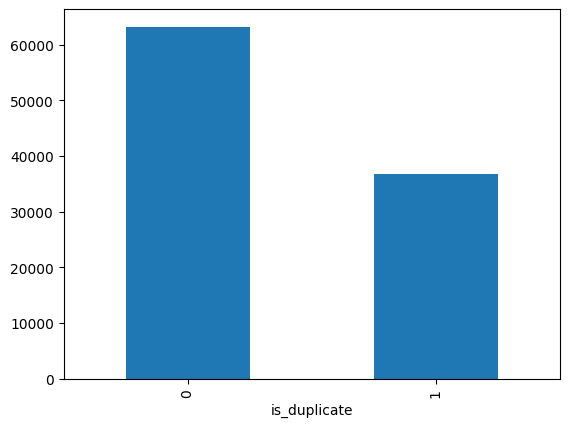

In [30]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')#the data is almost balanced no need to worry

In [31]:
# Repeated questions duplicated rows

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 165976
Number of questions getting repeated 19488


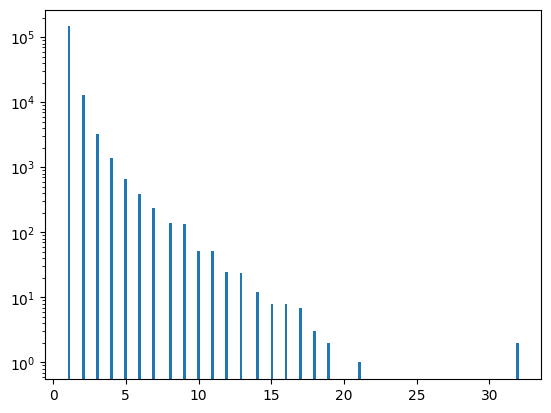

In [32]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()#almost 10**4 are repeating more than 1 

In [33]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [34]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,74,75.0
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,47,55.0
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,101,115.0
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,56,143.0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,34,49.0


In [35]:
new_df['question2'] = new_df['question2'].fillna("")

In [36]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x: len(x.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x: len(x.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,74,75.0,12,12
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,47,55.0,12,15
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,101,115.0,25,17
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,56,143.0,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,34,49.0,5,9


In [37]:
def common_words(row):#common cheez nikalni h set better h 
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [38]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,74,75.0,12,12,11
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,47,55.0,12,15,7
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,101,115.0,25,17,2
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,56,143.0,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,34,49.0,5,9,3


In [39]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [40]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,74,75.0,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,47,55.0,12,15,7,22
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,101,115.0,25,17,2,34
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,56,143.0,12,30,0,31
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,34,49.0,5,9,3,13


In [41]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,74,75.0,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,47,55.0,12,15,7,22,0.32
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,101,115.0,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,56,143.0,12,30,0,31,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,34,49.0,5,9,3,13,0.23


minimum characters 0
maximum characters 383
average num of characters 57


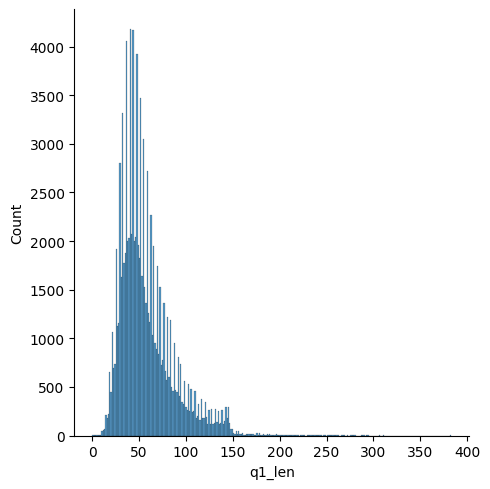

In [42]:
# Analysis of features
sns.displot(new_df['q1_len'])#outlier h ye hatao thod IMPROVEMENT HIGA
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 4.0
maximum characters 1117.0
average num of characters 58


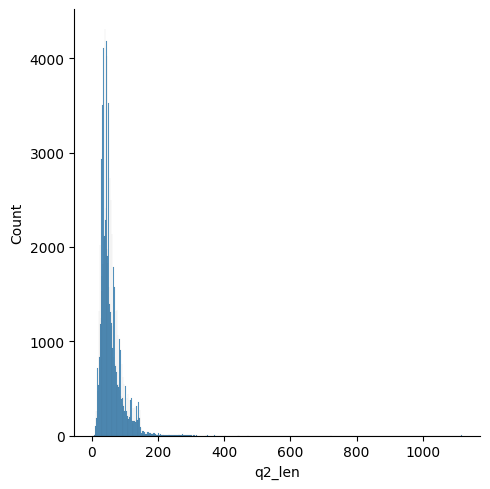

In [43]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


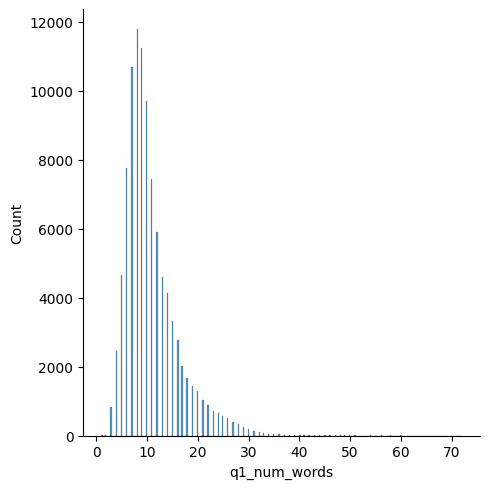

In [44]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


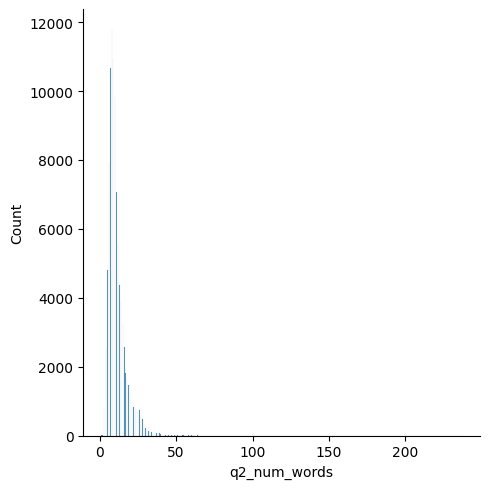

In [45]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

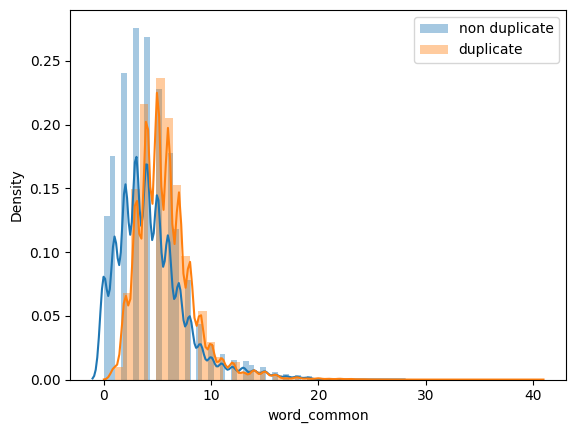

In [46]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()#dekhi isse dikh rha word common imp feature b jise agr word common>4 h toh  duplicate hone kmi pro  jyad

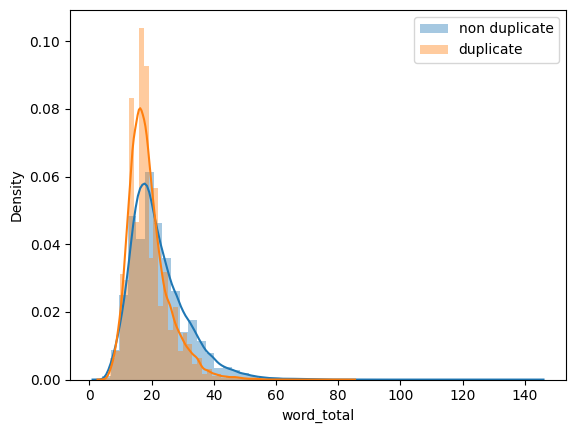

In [47]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()#same isse dikh rha word total imp feature h jaiase gar word total 8-20 ke beech h toh duplicate ki prob jyuada

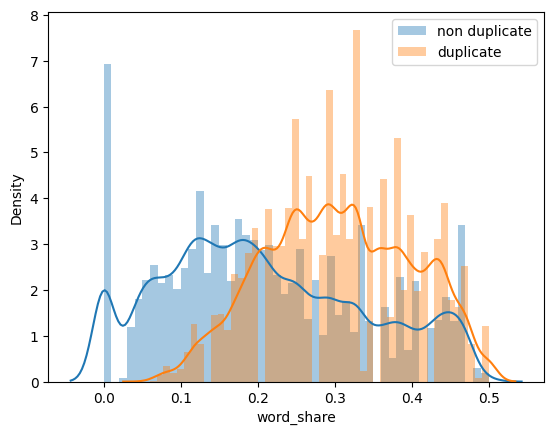

In [48]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()#imp as dekh word_share>0.2 h toh duplicate hone ke chances jyada

In [49]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...
327711,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...
367788,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy


In [50]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(100000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,74,75.0,12,12,11,24,0.46
115086,0,47,55.0,12,15,7,22,0.32
327711,0,101,115.0,25,17,2,34,0.06
367788,0,56,143.0,12,30,0,31,0.00
151235,0,34,49.0,5,9,3,13,0.23


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [52]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(100000, 8000)

In [53]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()#8008 aise dekh ek col ko 4000 hue toh q1 a2 =8000 ek duokicate wala output =1 aur 7 nye khud ke features

(100000, 8008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
398782,1,74,75.0,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,47,55.0,12,15,7,22,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,101,115.0,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,56,143.0,12,30,0,31,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
151235,0,34,49.0,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7896

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.77335


In [68]:
import pickle

# Save the RandomForest model using pickle
with open("model.pkl", "wb") as file:
    pickle.dump(rf, file)
with open("cv.pkl", "wb") as file2:
    pickle.dump(cv, file2)


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf2 = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=20,           # Maximum depth of the trees
    min_samples_split=5     # Minimum number of samples required to split an internal node
)

rf2.fit(X_train,y_train)
y_pred = rf2.predict(X_test)
accuracy_score(y_test,y_pred)

0.68525

In [61]:
rf.estimator

DecisionTreeClassifier()

In [67]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf3 = RandomForestClassifier(
    n_estimators=100,       
    min_samples_split=5,    
    min_impurity_decrease=0.0001
)

rf3.fit(X_train,y_train)
y_pred = rf3.predict(X_test)
accuracy_score(y_test,y_pred)

0.6863